In [90]:
# Imports list

import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [91]:
# Importing the dataset

fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

In [92]:
# Scaling the data and creating a validation set for training

X_valid, X_train = X_train_full[:5000] / 255.0, X_train_full[5000:] / 255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [93]:
# List of the class names for our dataset

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat", "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [94]:
# Check for a value

class_names[y_train[0]]

'Coat'

In [95]:
# Creating the nn

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

# or

model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

model.summary()

Model: "sequential_15"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_15 (Flatten)        (None, 784)               0         
                                                                 
 dense_45 (Dense)            (None, 300)               235500    
                                                                 
 dense_46 (Dense)            (None, 100)               30100     
                                                                 
 dense_47 (Dense)            (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [96]:
# Can't quite remember the terms for this... maybe initializing the nn's params... that's not accurate

model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

In [97]:
# Train the nn

history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))

Epoch 1/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.7098 - accuracy: 0.7682 - val_loss: 0.5300 - val_accuracy: 0.8094
Epoch 2/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4860 - accuracy: 0.8308 - val_loss: 0.4546 - val_accuracy: 0.8410
Epoch 3/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4429 - accuracy: 0.8445 - val_loss: 0.4240 - val_accuracy: 0.8518
Epoch 4/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4162 - accuracy: 0.8539 - val_loss: 0.4243 - val_accuracy: 0.8452
Epoch 5/20
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3981 - accuracy: 0.8597 - val_loss: 0.3888 - val_accuracy: 0.8626
Epoch 6/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3809 - accuracy: 0.8650 - val_loss: 0.3772 - val_accuracy: 0.8660
Epoch 7/20
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3682 - accuracy: 0.8694 - val_loss: 0.3646 - val_accuracy:

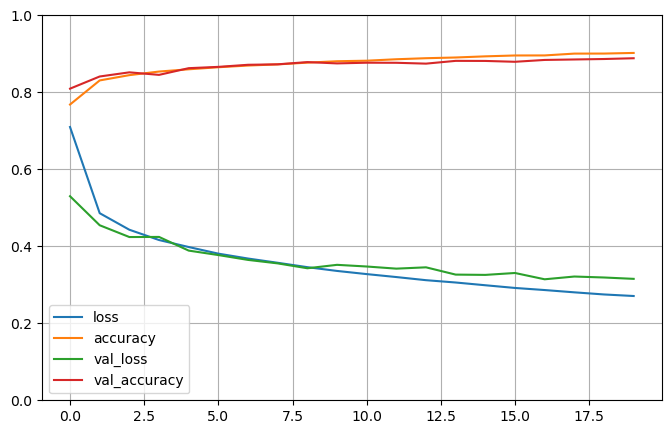

In [98]:
# Plot the training data

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [99]:
# Elvauate on the test set

model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 67.6460 - accuracy: 0.8339


[67.64600372314453, 0.833899974822998]

In [100]:
# Run a prediction

X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 48ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [101]:
# Run a prediction on just the class type, not the item of clothing, type of clothing in other words

# y_pred = model.predict_classes(X_new) # this is depreciated, for classification MLPs use the below instead
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 17ms/step


array([9, 2, 1])

In [102]:
# Display the actual names of the classes

np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [103]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [66]:
# The classifier got all three correct!